In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)


from markov_pyactup import *
from statsmodels.formula.api import logit, glm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


main_dir = os.path.dirname(os.path.realpath('../__file__'))

Error trying to connect to ACT-R at 127.0.0.1 : 2650 with exception (<class 'ConnectionRefusedError'>, ConnectionRefusedError(61, 'Connection refused'), <traceback object at 0x7f8e89fe9540>)
ACT-R connection NOT established, but no exception detected or already handled.
Could not start ACT-R connection.


## Single Run 

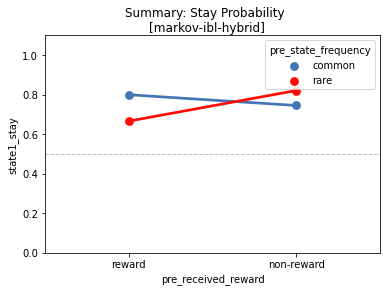

In [4]:
# model_name='markov-rl-hybrid'
model_name='markov-ibl-hybrid'
r1, r0 = 1, 0
params = {'REWARD': {'B1': (r1, r0), 'B2': (r1, r0), 'C1': (r1, r0), 'C2': (r1, r0)}}


m = MarkovIBL(verbose=0, model=model_name)
m.update_parameters(**params)
m.run_experiment(n=200) 
Plot.plot_response_switch(m.calculate_stay_probability(), model_name=model_name, dep_var_suffix="", barplot=False)
# Plot.plot_response_time(m.calculate_stay_probability(), model_name=model_name, dep_var_suffix="")

# 

In [3]:
# pprint.pprint(m.memory) #dm

In [4]:
# pprint.pprint(m.memory.activation_history) #dm

## IBL-MB

  0%|          | 0/50 [00:00<?, ?it/s]

################## SETUP MODEL markov-ibl-mb ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, 0), 'B2': (1, 0), 'C1': (1, 0), 'C2': (1, 0)}, 'alpha': 0.2, 'beta': 5, 'beta_mf': 5, 'beta_mb': 5, 'lambda_parameter': 0.2, 'p_parameter': 0, 'temperature': 0.2, 'decay': 0.2, 'lf': 0.63, 'fixed_cost': 0.585}


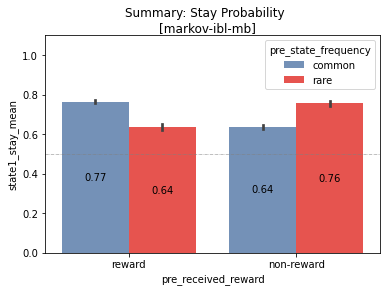

In [5]:
model_name='markov-ibl-mb'
df = MarkovSimulation.run_simulations(model=model_name, e=50, verbose=True,  **params)
Plot.plot_response_switch(df, model_name=model_name, dep_var_suffix="_mean", barplot=True)

## IBL-Hybrid (w=1 MB)

  0%|          | 0/50 [00:00<?, ?it/s]

################## SETUP MODEL markov-ibl-hybrid ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, 0), 'B2': (1, 0), 'C1': (1, 0), 'C2': (1, 0)}, 'alpha': 0.2, 'beta': 5, 'beta_mf': 5, 'beta_mb': 5, 'lambda_parameter': 0.6, 'p_parameter': 0, 'temperature': 0.2, 'decay': 0.99, 'lf': 0.63, 'fixed_cost': 0.585}


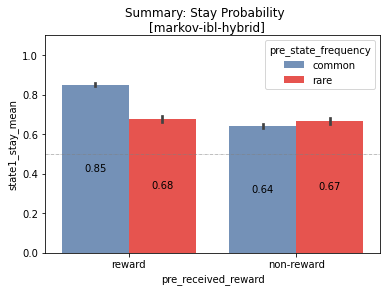

In [4]:
model_name='markov-ibl-hybrid'
df = MarkovSimulation.run_simulations(model=model_name, e=50, verbose=True, \
                                      **params, \
                                      alpha=.2, beta=5, beta_mf=5, beta_mb=5, \
                                      temperature=.2, decay=.99,
                                      p_parameter=0, lambda_parameter=.6)
Plot.plot_response_switch(df, model_name=model_name, dep_var_suffix="_mean", barplot=True)

## IBL-Hybrid (w=0 MF)

In [ ]:
model_name='markov-ibl-hybrid'
df = MarkovSimulation.run_simulations(model=model_name, e=100, verbose=True, \
                                      **params, \
                                      alpha=.2, beta=5, beta_mf=10, beta_mb=0, \
                                      temperature=.2, decay=.5,
                                      p_parameter=0, lambda_parameter=.6)
Plot.plot_response_switch(df, model_name=model_name, dep_var_suffix="_mean", barplot=True)

## IBL-Hybrid (w=.5 Mixture)

In [ ]:
model_name='markov-ibl-hybrid'
df = MarkovSimulation.run_simulations(model=model_name, e=100, verbose=True, \
                                      **params, \
                                      alpha=.2, beta=5, beta_mf=10, beta_mb=10, \
                                      temperature=.2, decay=.5,
                                      p_parameter=0, lambda_parameter=.6)
Plot.plot_response_switch(df, model_name=model_name, dep_var_suffix="_mean", barplot=True)

## RL-MF

  0%|          | 0/100 [00:00<?, ?it/s]

################## SETUP MODEL markov-rl-mf ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, 0), 'B2': (1, 0), 'C1': (1, 0), 'C2': (1, 0)}, 'alpha': 0.2, 'beta': 30, 'beta_mf': 20, 'beta_mb': 5, 'lambda_parameter': 0.1, 'p_parameter': 1, 'temperature': 0.2, 'decay': 0.5, 'lf': 0.63, 'fixed_cost': 0.585}


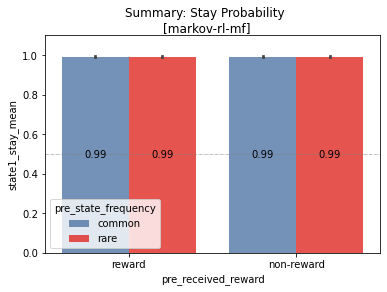

In [15]:
model_name='markov-rl-mf'
df = MarkovSimulation.run_simulations(model=model_name, e=100, verbose=True, \
                                      **params, \
                                      alpha=.2, beta=30, beta_mf=20, beta_mb=5, \
                                      temperature=.2, decay=.5,
                                      p_parameter=1, lambda_parameter=.1)
Plot.plot_response_switch(df, model_name=model_name, dep_var_suffix="_mean", barplot=True)

## RL-MB

In [ ]:
model_name='markov-rl-mb'
df = MarkovSimulation.run_simulations(model=model_name, e=100, verbose=True, \
                                      **params, \
                                      alpha=.2, beta=5, beta_mf=0, beta_mb=10, \
                                      temperature=.2, decay=.5,
                                      p_parameter=0, lambda_parameter=.6)
Plot.plot_response_switch(df, model_name=model_name, dep_var_suffix="_mean", barplot=True)

## RL-Hybrid (w=.5 Mixture)

In [ ]:
model_name='markov-rl-hybrid'
df = MarkovSimulation.run_simulations(model=model_name, e=100, verbose=True, \
                                      **params, \
                                      alpha=.2, beta=5, beta_mf=10, beta_mb=10, \
                                      temperature=.2, decay=.5,
                                      p_parameter=0, lambda_parameter=.6)
Plot.plot_response_switch(df, model_name=model_name, dep_var_suffix="_mean", barplot=True)